## Bibliotecas utilizadas

In [641]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from sklearn.model_selection import train_test_split
from sklearn import svm

## Filtros utilizados

In [642]:
def butter_bandpass(data, lowcut, highcut, fs=200, order=4):
    nyq = fs * 0.5
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='bandpass')
    return signal.filtfilt(b, a, data)


def butter_lowpass(data, lowcut, fs=200, order=4):
    nyq = fs * 0.5
    low = lowcut / nyq
    b, a = signal.butter(order, low, btype='lowpass')
    return signal.filtfilt(b, a, data)


def butter_highpass(data, highcut, fs=200, order=4):
    nyq = fs * 0.5
    high = highcut / nyq
    b, a = signal.butter(order, high, btype='highpass')
    return signal.filtfilt(b, a, data)


def butter_notch(data, cutoff, var=1, fs=200, order=4):
    nyq = fs * 0.5
    low = (cutoff - var) / nyq
    high = (cutoff + var) / nyq
    b, a = signal.iirfilter(order, [low, high], btype='bandstop', ftype="butter")
    return signal.filtfilt(b, a, data)


## Importando os dados

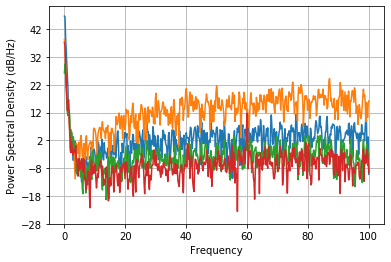

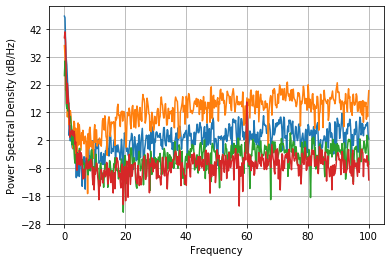

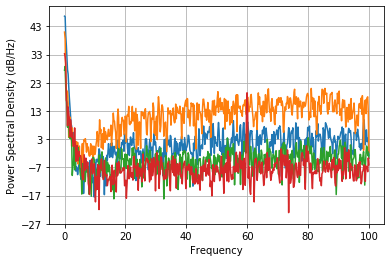

In [643]:
experiment_1 = []
experiment_1.append(np.load('1_EMG_Danilo_02-12-2019_201433.npy').transpose(0, 2, 1))
experiment_1.append(np.load('1_EMG_Danilo_02-12-2019_201601.npy').transpose(0, 2, 1))
experiment_1.append(np.load('1_EMG_Danilo_02-12-2019_201252.npy').transpose(0, 2, 1))

for exp in experiment_1:
    for i in range(exp.shape[1]):
        plt.psd(exp[3,i,:], 1024, 200, noverlap=512)
    plt.show()


## Aplicando os filtros

### Aplicando filtro notch

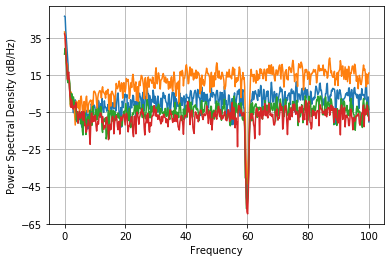

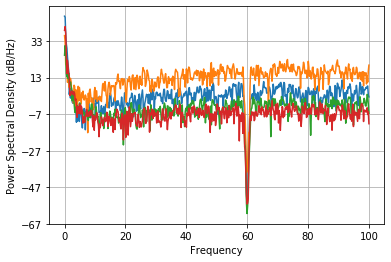

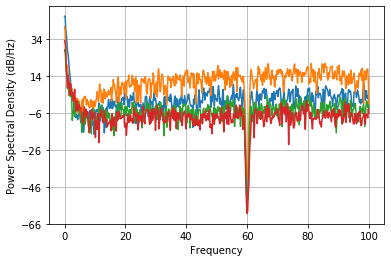

In [644]:

for exp in experiment_1:
    exp = butter_notch(exp, 60)
    for i in range(exp.shape[1]):
        plt.psd(exp[3,i,:], 1024, 200, noverlap=512)
    plt.show()


### Aplicando o filtro bandpass

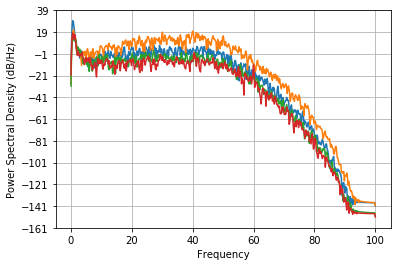

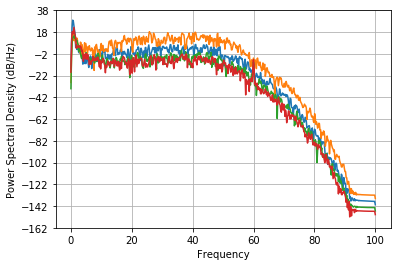

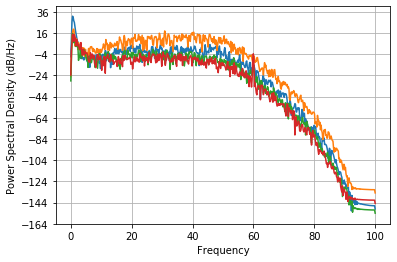

In [645]:
for exp in experiment_1:
    exp = butter_bandpass(exp, 0.5, 50)
    for i in range(exp.shape[1]):
        plt.psd(exp[3,i,:], 1024, 200, noverlap=512)
    plt.show()



## Formatando os dados corretamente

In [1211]:
experiment_1 = np.array(experiment_1)
print(experiment_1.shape)
experiment_1 = experiment_1.transpose(1, 0, 2, 3)
experiment_1.shape

(5, 3, 4, 2000)


(3, 5, 4, 2000)

## Segmentação dos dados

In [1603]:
#### print(experiment_1.shape)

salto = 5
segmento = 50
# n_win = int((experiment_1.shape[-1] - segmento)/salto) + 1
# n_win = 60
n_win = 50
ids = np.arange(n_win) * salto
x_time = np.array([experiment_1[:,:,:,k:(k + segmento)] for k in ids]).transpose(1, 2, 3, 0, 4)
print(x_time.shape)

(5, 3, 4, 50, 50)


# Características no domínio do tempo

In [1604]:
# IEMG
iemg = np.sum(np.abs(x_time), axis=-1)
print(iemg.shape)

# MAV
mav = np.sum(np.abs(x_time), axis=-1) / len(x_time)
print(mav.shape)

# VAR
var = np.sum(x_time ** 2, axis=-1) / (np.prod(x_time.shape[:-1]) - 1)
print(var.shape)

# SSI
ssi = np.sum(np.abs(x_time**2), axis=-1) / len(x_time)
print(ssi.shape)

(5, 3, 4, 50)
(5, 3, 4, 50)
(5, 3, 4, 50)
(5, 3, 4, 50)



## Aplicando o SVM
### Vetor de características para o domínio do tempo

In [1605]:
features = list()
for feature in (iemg, mav, var, ssi):
    feature = feature.transpose(0, 1, 3, 2)
    feature = feature.reshape(5 * 3 * n_win, 4)
#     print('Feature: {}'.format(feature), feature.shape)
    features.append(feature)

x_features = np.concatenate(features, axis=-1)
x_features.shape

(750, 16)

### Obtendo vetor de labels

In [1606]:
y_features = np.array([[str(i)] * int(x_features.shape[0] / 5) for i in range(5)])
y_features = y_features.reshape(y_features.shape[0] * y_features.shape[1])
y_features.shape

(750,)

### Aplicação do classificador e testando (SVM)

In [1693]:
## dividindo as porções de dados em treino e teste (80 e 20% respectivamente)
X_train, X_test, y_train, y_test = train_test_split(x_features, y_features, test_size=0.2, shuffle=True)

# o trabalho das diferentes parametrizações ficam a cargo dos alunos
clf = svm.SVC(gamma=0.00000003, class_weight='balanced')
clf.fit(X_train, y_train)

res = clf.predict(X_test)
tot_hit = sum([1 for i in range(len(res)) if res[i] == y_test[i]])
print('Acurácia: {:.2f}%'.format(tot_hit / X_test.shape[0] * 100))

Acurácia: 84.00%


## Experimento 2

## Importando os dados

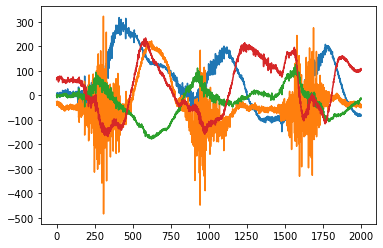

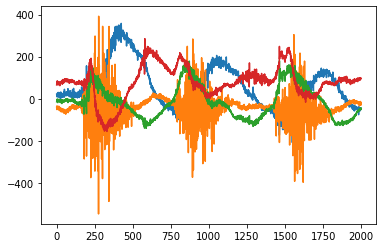

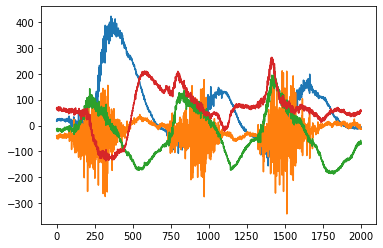

In [1694]:
experiment_1 = []
experiment_1.append(np.load('2_EMG_Danilo_02-12-2019_202431.npy').transpose(0, 2, 1))
experiment_1.append(np.load('2_EMG_Danilo_02-12-2019_202307.npy').transpose(0, 2, 1))
experiment_1.append(np.load('2_EMG_Danilo_02-12-2019_201941.npy').transpose(0, 2, 1))

for exp in experiment_1:
    for i in range(exp.shape[1]):
        plt.plot(exp[3,i,:])
    plt.show()


## Aplicando os filtros

### Aplicando filtro notch

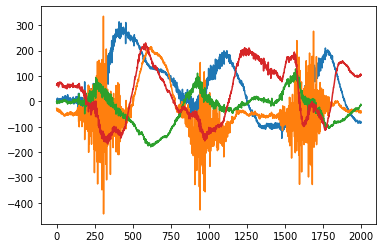

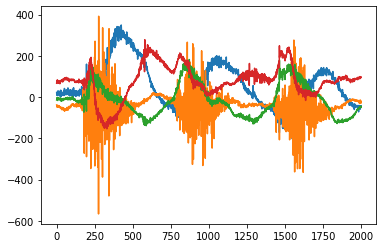

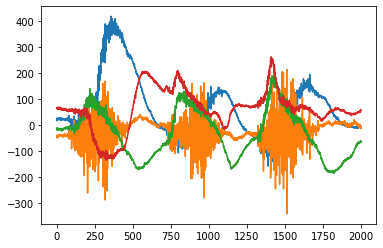

In [1695]:

for exp in experiment_1:
    exp = butter_notch(exp, 60)
    for i in range(exp.shape[1]):
        plt.plot(exp[3,i,:])
    plt.show()


### Aplicando o filtro bandpass

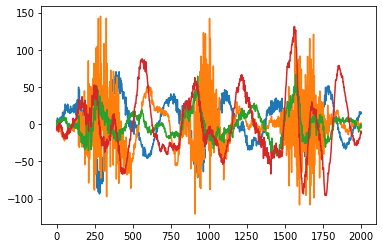

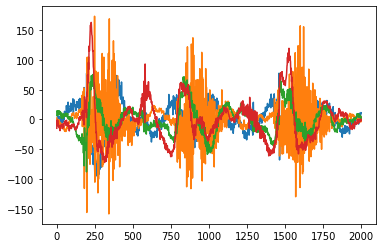

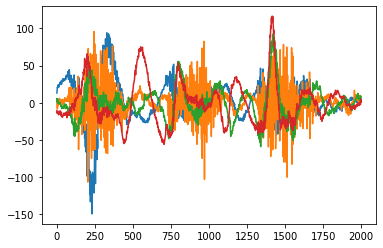

In [1696]:
for exp in experiment_1:
    exp = butter_bandpass(exp, 0.5, 50)
    for i in range(exp.shape[1]):
        plt.plot(exp[3,i,:])
    plt.show()



## Formatando os dados corretamente

In [1697]:
experiment_1 = np.array(experiment_1)
print(experiment_1.shape)
experiment_1 = experiment_1.transpose(1, 0, 2, 3)
experiment_1.shape

(3, 5, 4, 2000)


(5, 3, 4, 2000)

## Segmentação dos dados

In [1875]:
print(experiment_1.shape)

salto = 10
segmento = 50
# n_win = int((experiment_1.shape[-1] - segmento) / salto ) + 1
n_win = 51
ids = np.arange(n_win) * salto
x_time = np.array([experiment_1[:,:,:,k:(k + segmento)] for k in ids]).transpose(1, 2, 3, 0, 4)
print(x_time.shape)

(5, 3, 4, 2000)
(5, 3, 4, 51, 50)


# Características no domínio do tempo

In [1876]:
# IEMG
iemg = np.sum(np.abs(x_time), axis=-1)
print(iemg.shape)

# MAV
mav = np.sum(np.abs(x_time), axis=-1) / len(x_time)
print(mav.shape)

# VAR
var = np.sum(x_time ** 2, axis=-1) / (np.prod(x_time.shape[:-1]) - 1)
print(var.shape)

# SSI
ssi = np.sum(np.abs(x_time**2), axis=-1) / len(x_time)
print(ssi.shape)

(5, 3, 4, 51)
(5, 3, 4, 51)
(5, 3, 4, 51)
(5, 3, 4, 51)



## Aplicando o SVM
### Vetor de características para o domínio do tempo

In [1877]:
features = list()
for feature in (iemg, mav, var, ssi):
    feature = feature.transpose(0, 1, 3, 2)
    feature = feature.reshape(5 * 3 * n_win, 4)
#     print('Feature: {}'.format(feature), feature.shape)
    features.append(feature)

x_features = np.concatenate(features, axis=-1)
x_features.shape

(765, 16)

### Obtendo vetor de labels

In [1878]:
y_features = np.array([[str(i)] * int(x_features.shape[0] / 5) for i in range(5)])
y_features = y_features.reshape(y_features.shape[0] * y_features.shape[1])
y_features.shape

(765,)

### Aplicação do classificador e testando (SVM)

In [1896]:
## dividindo as porções de dados em treino e teste (80 e 20% respectivamente)
X_train, X_test, y_train, y_test = train_test_split(x_features, y_features, test_size=0.2, shuffle=True)

# o trabalho das diferentes parametrizações ficam a cargo dos alunos
clf = svm.SVC(gamma=0.0000000008, class_weight='balanced')
clf.fit(X_train, y_train)

res = clf.predict(X_test)
tot_hit = sum([1 for i in range(len(res)) if res[i] == y_test[i]])
print('Acurácia: {:.2f}%'.format(tot_hit / X_test.shape[0] * 100))

Acurácia: 67.97%
